In [57]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open('../data/tweet-annotator-raw-data.json') as json_file:
    data = json.load(json_file)

In [9]:
data['tweets'] = [tweet for tweet in data['tweets'] if 'annotatedBy' in tweet]

In [10]:
unique_users = []
for tweet in data['tweets']:
    unique_users = unique_users + tweet['annotatedBy']
        
unique_users = list(set(unique_users))

In [30]:
unique_users

['pyNjv9i4A3WcRNK_mfmmq',
 'DZObnpKPO3cobSJWA6zaK',
 'Rl4CQwZ4w4Y6sClp5VCS0',
 '9BZANXTjpc2b8C8In5cY4',
 'uEFvWyp7i_JTr61rMgvpc',
 'az0rNSr8I83DWRGHt1RpJ',
 '_8OdW_ggLBKpTRnlypeUV',
 'lxDqrTwuZCV04obOBeyfw',
 'I-XBG_1NlWo0pc1YUVTsq',
 'cDi1Vfe9LPRtbZfMieOXg',
 'NQe3sR8pKUyqvQfmCSsPc',
 '_0-Dtu4abTAclzMPpk2op',
 'rULbr8lif98CPD6bBowhQ',
 '9c-zdRbtNg4rWX0JrWRsv',
 'gFwoTXkAcAckZCCs9-hbJ',
 'PBOTslQiQDWkz7n6gtRRy',
 '8B1cT3-y-kQ8mgVgYywEv',
 'xvKGJTxwjwJCiGyEeGjLn',
 'CShKY0dgwWXKFG6XeV8w3',
 'YCqKzGcQqZykIIWJe40QE',
 'M05QqnDZEu0Fj6qrTtdSG',
 'LZK4RILvq6lNKfIBDtpPT',
 'eaxrkYopmtY9uMfdftOeD',
 'feohhCkiAl599S9HGKkpe',
 'I5mbktxDVDrpS56_2ZzlF',
 'k0wpzFVmnn3NZgTqck0W_',
 'WP_erMqa4hMgzo4YZPl-9',
 'tLvSFKbPT-mpYhiAIxGEe',
 'yc5gVRH266TWsfvrLGiI6',
 'aifYnRrToVksZwh5Ka_rS',
 'wRKLb6zxuAPIsTWicXEb2',
 'hQZvZIseJXyUFJEZ78-fz',
 'f46DJlKR6QY5XAVvrTq0X',
 'a6d9bDERMgJ8CgOHwquoG',
 'pUV9RWUsVI-S3UReLVeLY',
 'EmEe2TEYxAFbNqbon8csP',
 'haeNlgCfyaVev3_bqw4HP',
 'AzsGJVwqQOEKbtdYSngED',
 '2zELMic0CC

In [13]:
def get_users_tweets(user_id):
    user_tweets=[]
    for tweet in data['tweets']:
        if user_id in tweet['annotatedBy']:
            index = tweet['annotatedBy'].index(user_id)
            annotation = tweet['annotations'][index]
            user_tweets.append((tweet['id'], annotation))
    return user_tweets

In [20]:
unique_users_with_tweets = {user_id: get_users_tweets(user_id) for user_id in unique_users}
unique_users_with_tweets['DZObnpKPO3cobSJWA6zaK']

[('1319551055424794631', 'neutralne'),
 ('1061979653726986241', 'neutralne'),
 ('1062011452767289344', 'wstret'),
 ('1321572453399719937', 'neutralne'),
 ('1052198937321385984', 'neutralne'),
 ('1321842227249893379', 'neutralne'),
 ('1061226007695425536', 'guilt'),
 ('1321928981009047552', 'strach'),
 ('1321174753269436421', 'zlosc'),
 ('1322187916127444993', 'neutralne'),
 ('1060444511208271873', 'oczekiwanie'),
 ('1195639787593633792', 'smutek'),
 ('1061627000685842433', 'radosc'),
 ('1322172260610940928', 'oczekiwanie'),
 ('727946964634095616', 'neutralne'),
 ('544849255635365888', 'neutralne'),
 ('1061003342036512774', 'zaskoczenie'),
 ('1208483496823525376', 'neutralne'),
 ('400981552450252800', 'guilt'),
 ('1053355515902861312', 'neutralne'),
 ('654210823775211521', 'neutralne'),
 ('954773771310821376', 'neutralne'),
 ('1060466042584096768', 'neutralne'),
 ('932251159800270848', 'neutralne'),
 ('1320956948783734784', 'guilt'),
 ('1207333805260001281', 'neutralne'),
 ('54528912290

In [26]:
def compare_users(user1_annot, user2_annot):
    matched_tweets = []
    missmatched_tweets = []
    for idx, annot in user1_annot:
        u2annot = list(filter(lambda x: x[0] == idx, user2_annot))
        if len(u2annot) != 0:
            if u2annot[0][1] == annot:
                matched_tweets.append(idx)
            else:
                missmatched_tweets.append(idx)
                
    return matched_tweets, missmatched_tweets

In [28]:
match, miss = compare_users(
    unique_users_with_tweets['pyNjv9i4A3WcRNK_mfmmq'], 
    unique_users_with_tweets['DZObnpKPO3cobSJWA6zaK']
)
print(match)
print(miss)

['1322172260610940928', '1208483496823525376', '665402819877470209', '1177267598758752257', '1060206947683700740', '1319357102419300352', '1318857982264922115', '547304503310319616', '714056108160237569', '699546598238515200', '269066654258970624']
['1180492203132686336', '1321455574689763328', '1321758161838215169', '1312701933455585281']


In [40]:
matched_df = pd.DataFrame(columns=['user'] + unique_users)
miss_df = pd.DataFrame(columns=['user'] + unique_users)
ratio_df = pd.DataFrame(columns=['user'] + unique_users)
for first_user in unique_users:
    curr_user_match_data = [first_user]
    curr_user_miss_data = [first_user]
    curr_user_ratio_data = [first_user]
    for sec_user in unique_users:
        match, miss = compare_users(
            unique_users_with_tweets[first_user], 
            unique_users_with_tweets[sec_user]
        )
        if len(match) + len(miss) == 0:
            curr_user_match_data.append(None)
            curr_user_miss_data.append(None)
            curr_user_ratio_data.append(None)
            continue
            
        curr_user_match_data.append(len(match))
        curr_user_miss_data.append(len(miss))
        curr_user_ratio_data.append(len(match)/(len(miss)+len(match)))
        
#     print(curr_user_match_data, len(curr_user_match_data))
    new_match_row = pd.Series(curr_user_match_data, index=['user'] + unique_users)
    matched_df = matched_df.append(new_match_row, ignore_index=True)
    new_miss_row = pd.Series(curr_user_miss_data, index=['user'] + unique_users)
    miss_df = miss_df.append(new_miss_row, ignore_index=True)
    new_ratio_row = pd.Series(curr_user_ratio_data, index=['user'] + unique_users)
    ratio_df = ratio_df.append(new_ratio_row, ignore_index=True)

In [52]:
matched_df.set_index('user', inplace=True)
miss_df.set_index('user', inplace=True)
ratio_df.set_index('user', inplace=True)

ratio_df.head(5)

,pyNjv9i4A3WcRNK_mfmmq,DZObnpKPO3cobSJWA6zaK,Rl4CQwZ4w4Y6sClp5VCS0,9BZANXTjpc2b8C8In5cY4,uEFvWyp7i_JTr61rMgvpc,az0rNSr8I83DWRGHt1RpJ,_8OdW_ggLBKpTRnlypeUV,lxDqrTwuZCV04obOBeyfw,I-XBG_1NlWo0pc1YUVTsq,cDi1Vfe9LPRtbZfMieOXg,...,aifYnRrToVksZwh5Ka_rS,wRKLb6zxuAPIsTWicXEb2,hQZvZIseJXyUFJEZ78-fz,f46DJlKR6QY5XAVvrTq0X,a6d9bDERMgJ8CgOHwquoG,pUV9RWUsVI-S3UReLVeLY,EmEe2TEYxAFbNqbon8csP,haeNlgCfyaVev3_bqw4HP,AzsGJVwqQOEKbtdYSngED,2zELMic0CCV-geiWqnXLZ
user,,,,,,,,,,,,,,,,,,,,,
pyNjv9i4A3WcRNK_mfmmq,1,0.733333,0.5,0.357143,0.4375,0.777778,1,None,0.666667,0.333333,...,0.666667,0.333333,0.5625,0.916667,0.5,0.416667,None,1,0.400000,None
DZObnpKPO3cobSJWA6zaK,0.733333,1,0.625,0.448276,0.588235,0.5,0,None,0.472222,0.642857,...,0.553191,0.428571,0.625,0.466667,0.5,0.463415,0.166667,0.2,0.629630,None
Rl4CQwZ4w4Y6sClp5VCS0,0.5,0.625,1,0.724138,0.6,0.681818,0,None,0.545455,0.636364,...,0.692308,0.5625,0.658537,0.736842,0.40625,0.705882,1,0.666667,0.693878,0.5
9BZANXTjpc2b8C8In5cY4,0.357143,0.448276,0.724138,1,0.545455,0.5,0,None,0.55814,0.565217,...,0.551724,0.647059,0.5,0.448276,0.666667,0.48,0.75,0.555556,0.800000,None
uEFvWyp7i_JTr61rMgvpc,0.4375,0.588235,0.6,0.545455,1,0.782609,0.5,None,0.622951,0.694444,...,0.741935,0.75,0.638889,0.513514,0.5,0.65625,0.25,0.461538,0.846154,None


In [71]:
matched_df.values[[np.arange(matched_df.shape[0])]*2] = None
miss_df.values[[np.arange(miss_df.shape[0])]*2] = None

<ipython-input-71-fec6278cf775>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matched_df.values[[np.arange(matched_df.shape[0])]*2] = None
<ipython-input-71-fec6278cf775>:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  miss_df.values[[np.arange(miss_df.shape[0])]*2] = None


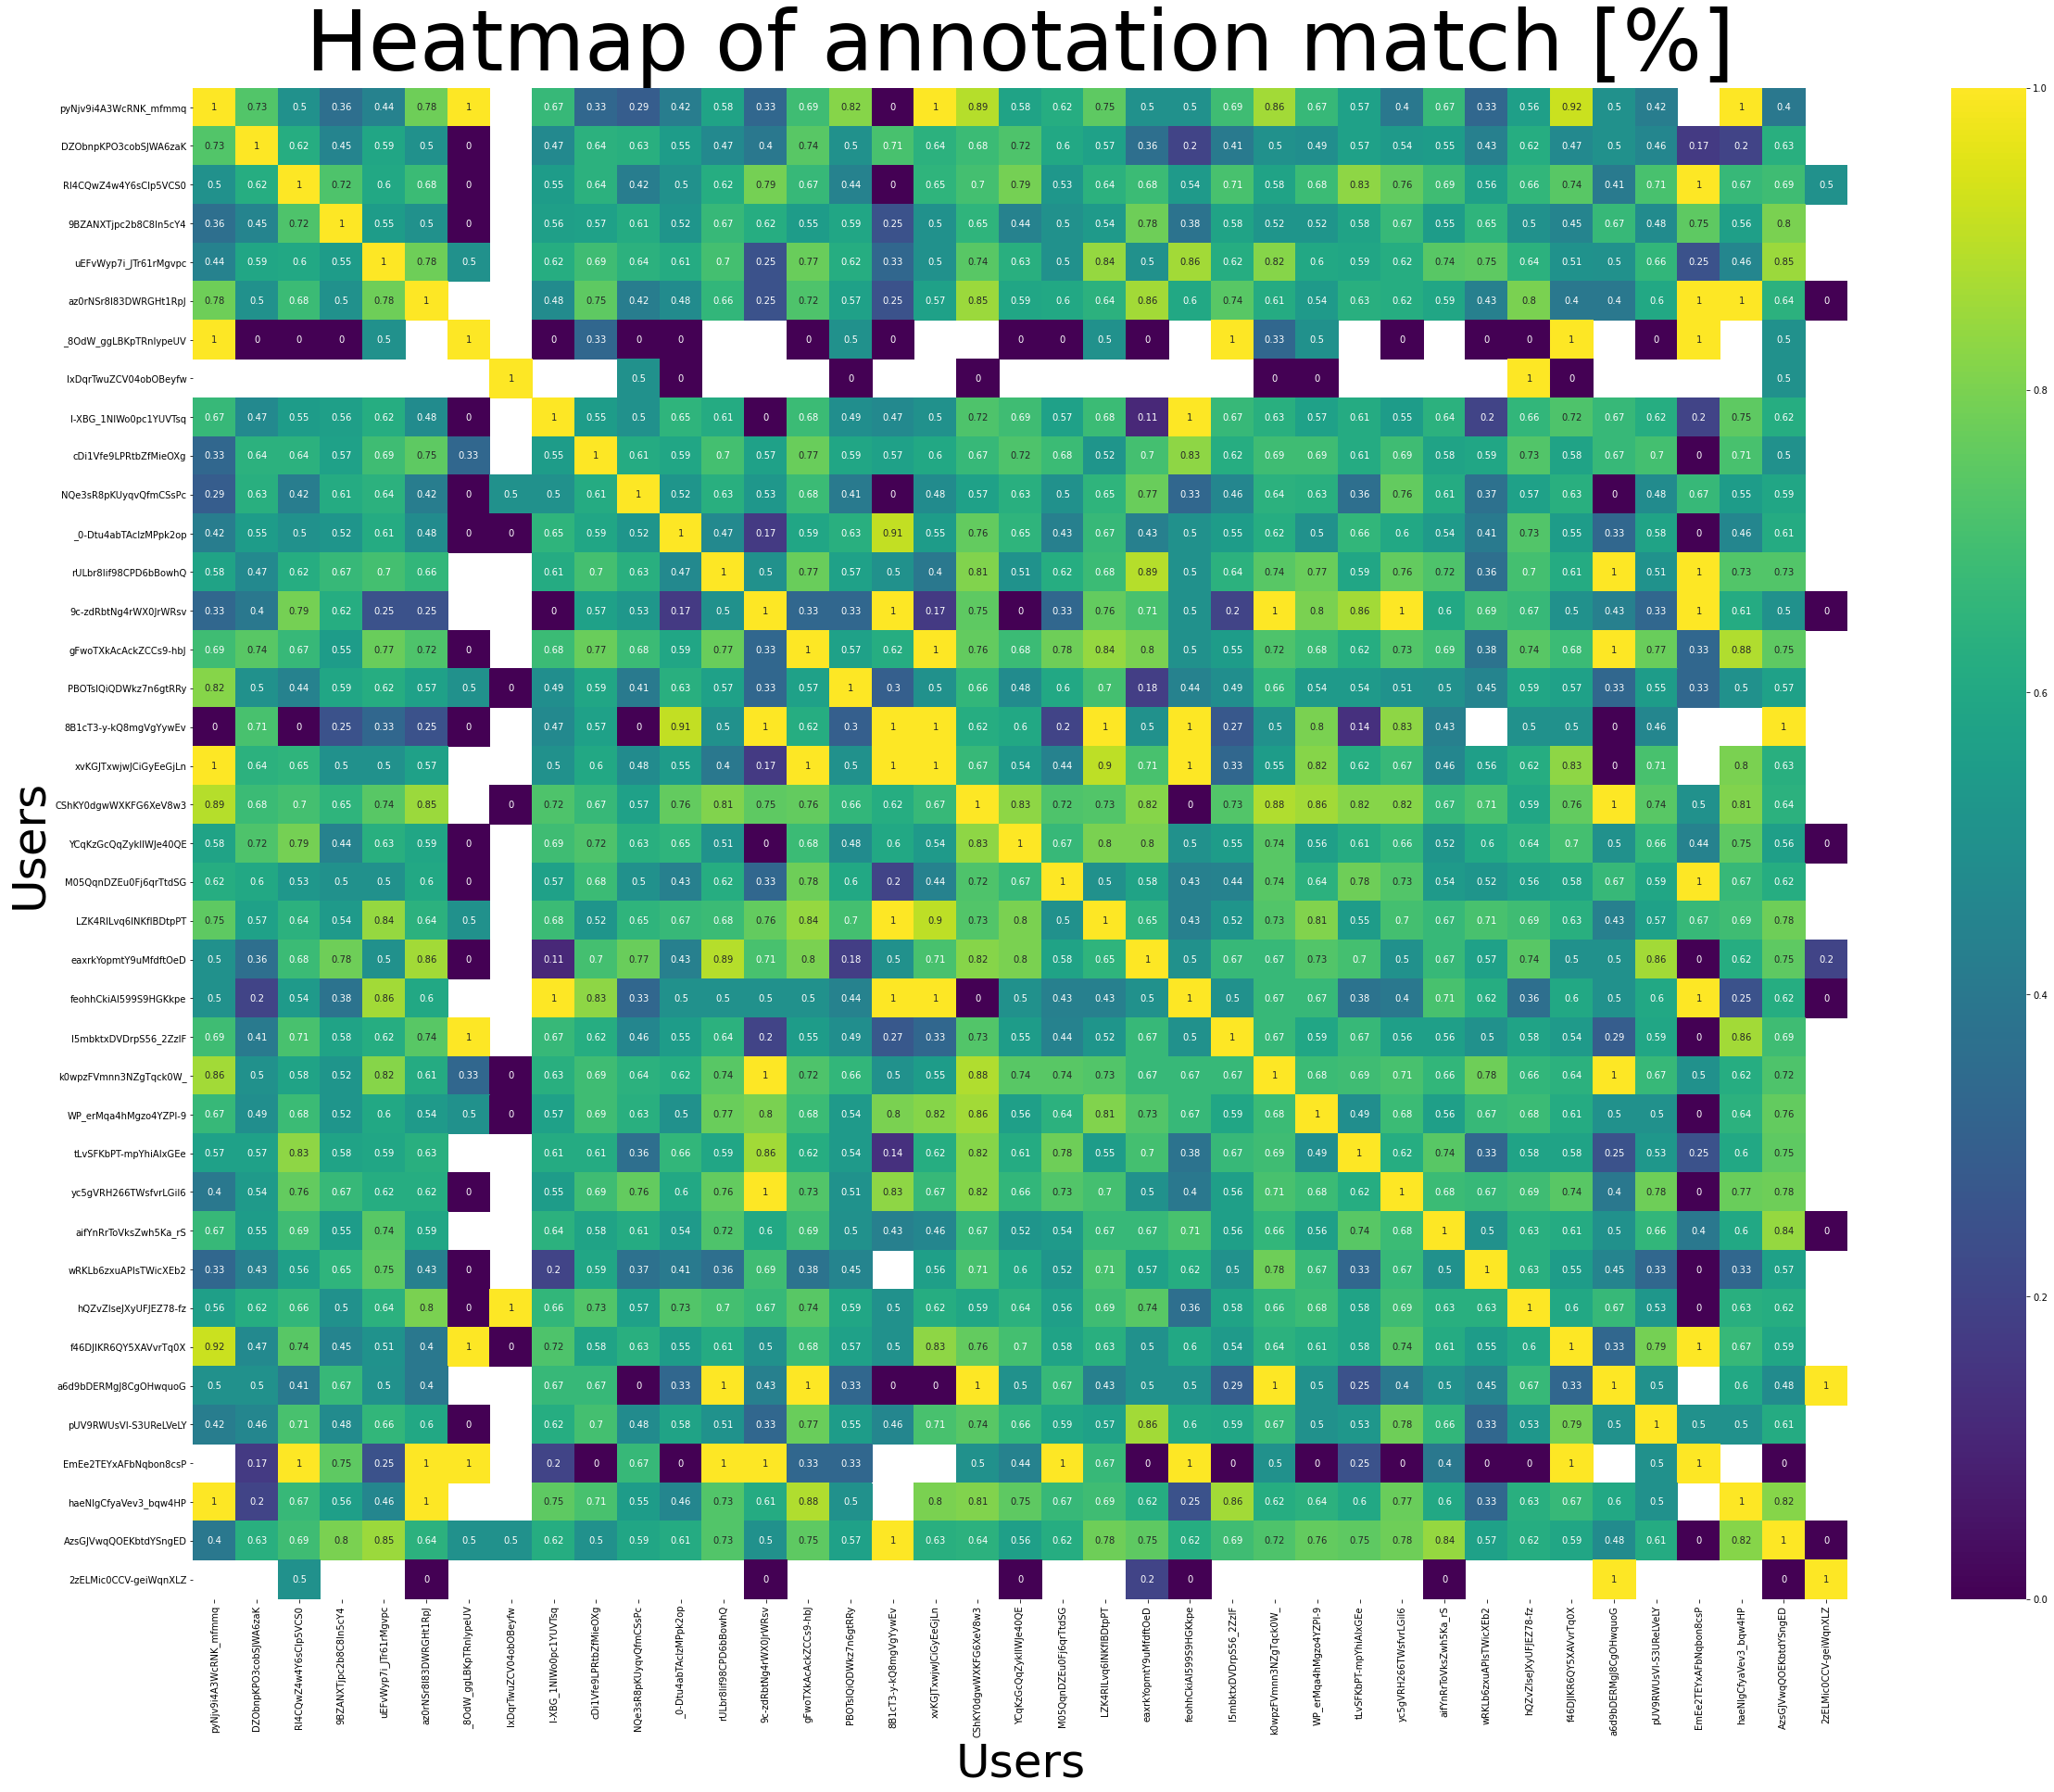

In [66]:
# ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
hdf = ratio_df.fillna(0).round(2)
plt.figure(figsize=(40,30))
ax = sns.heatmap(hdf, annot=True, fmt="g", cmap='viridis', mask=ratio_df.isnull())

plt.title('Heatmap of annotation match [%]', fontsize = 90) # title with fontsize 20
plt.xlabel('Users', fontsize = 50) # x-axis label with fontsize 15
plt.ylabel('Users', fontsize = 50) # y-axis label with fontsize 15
plt.show()

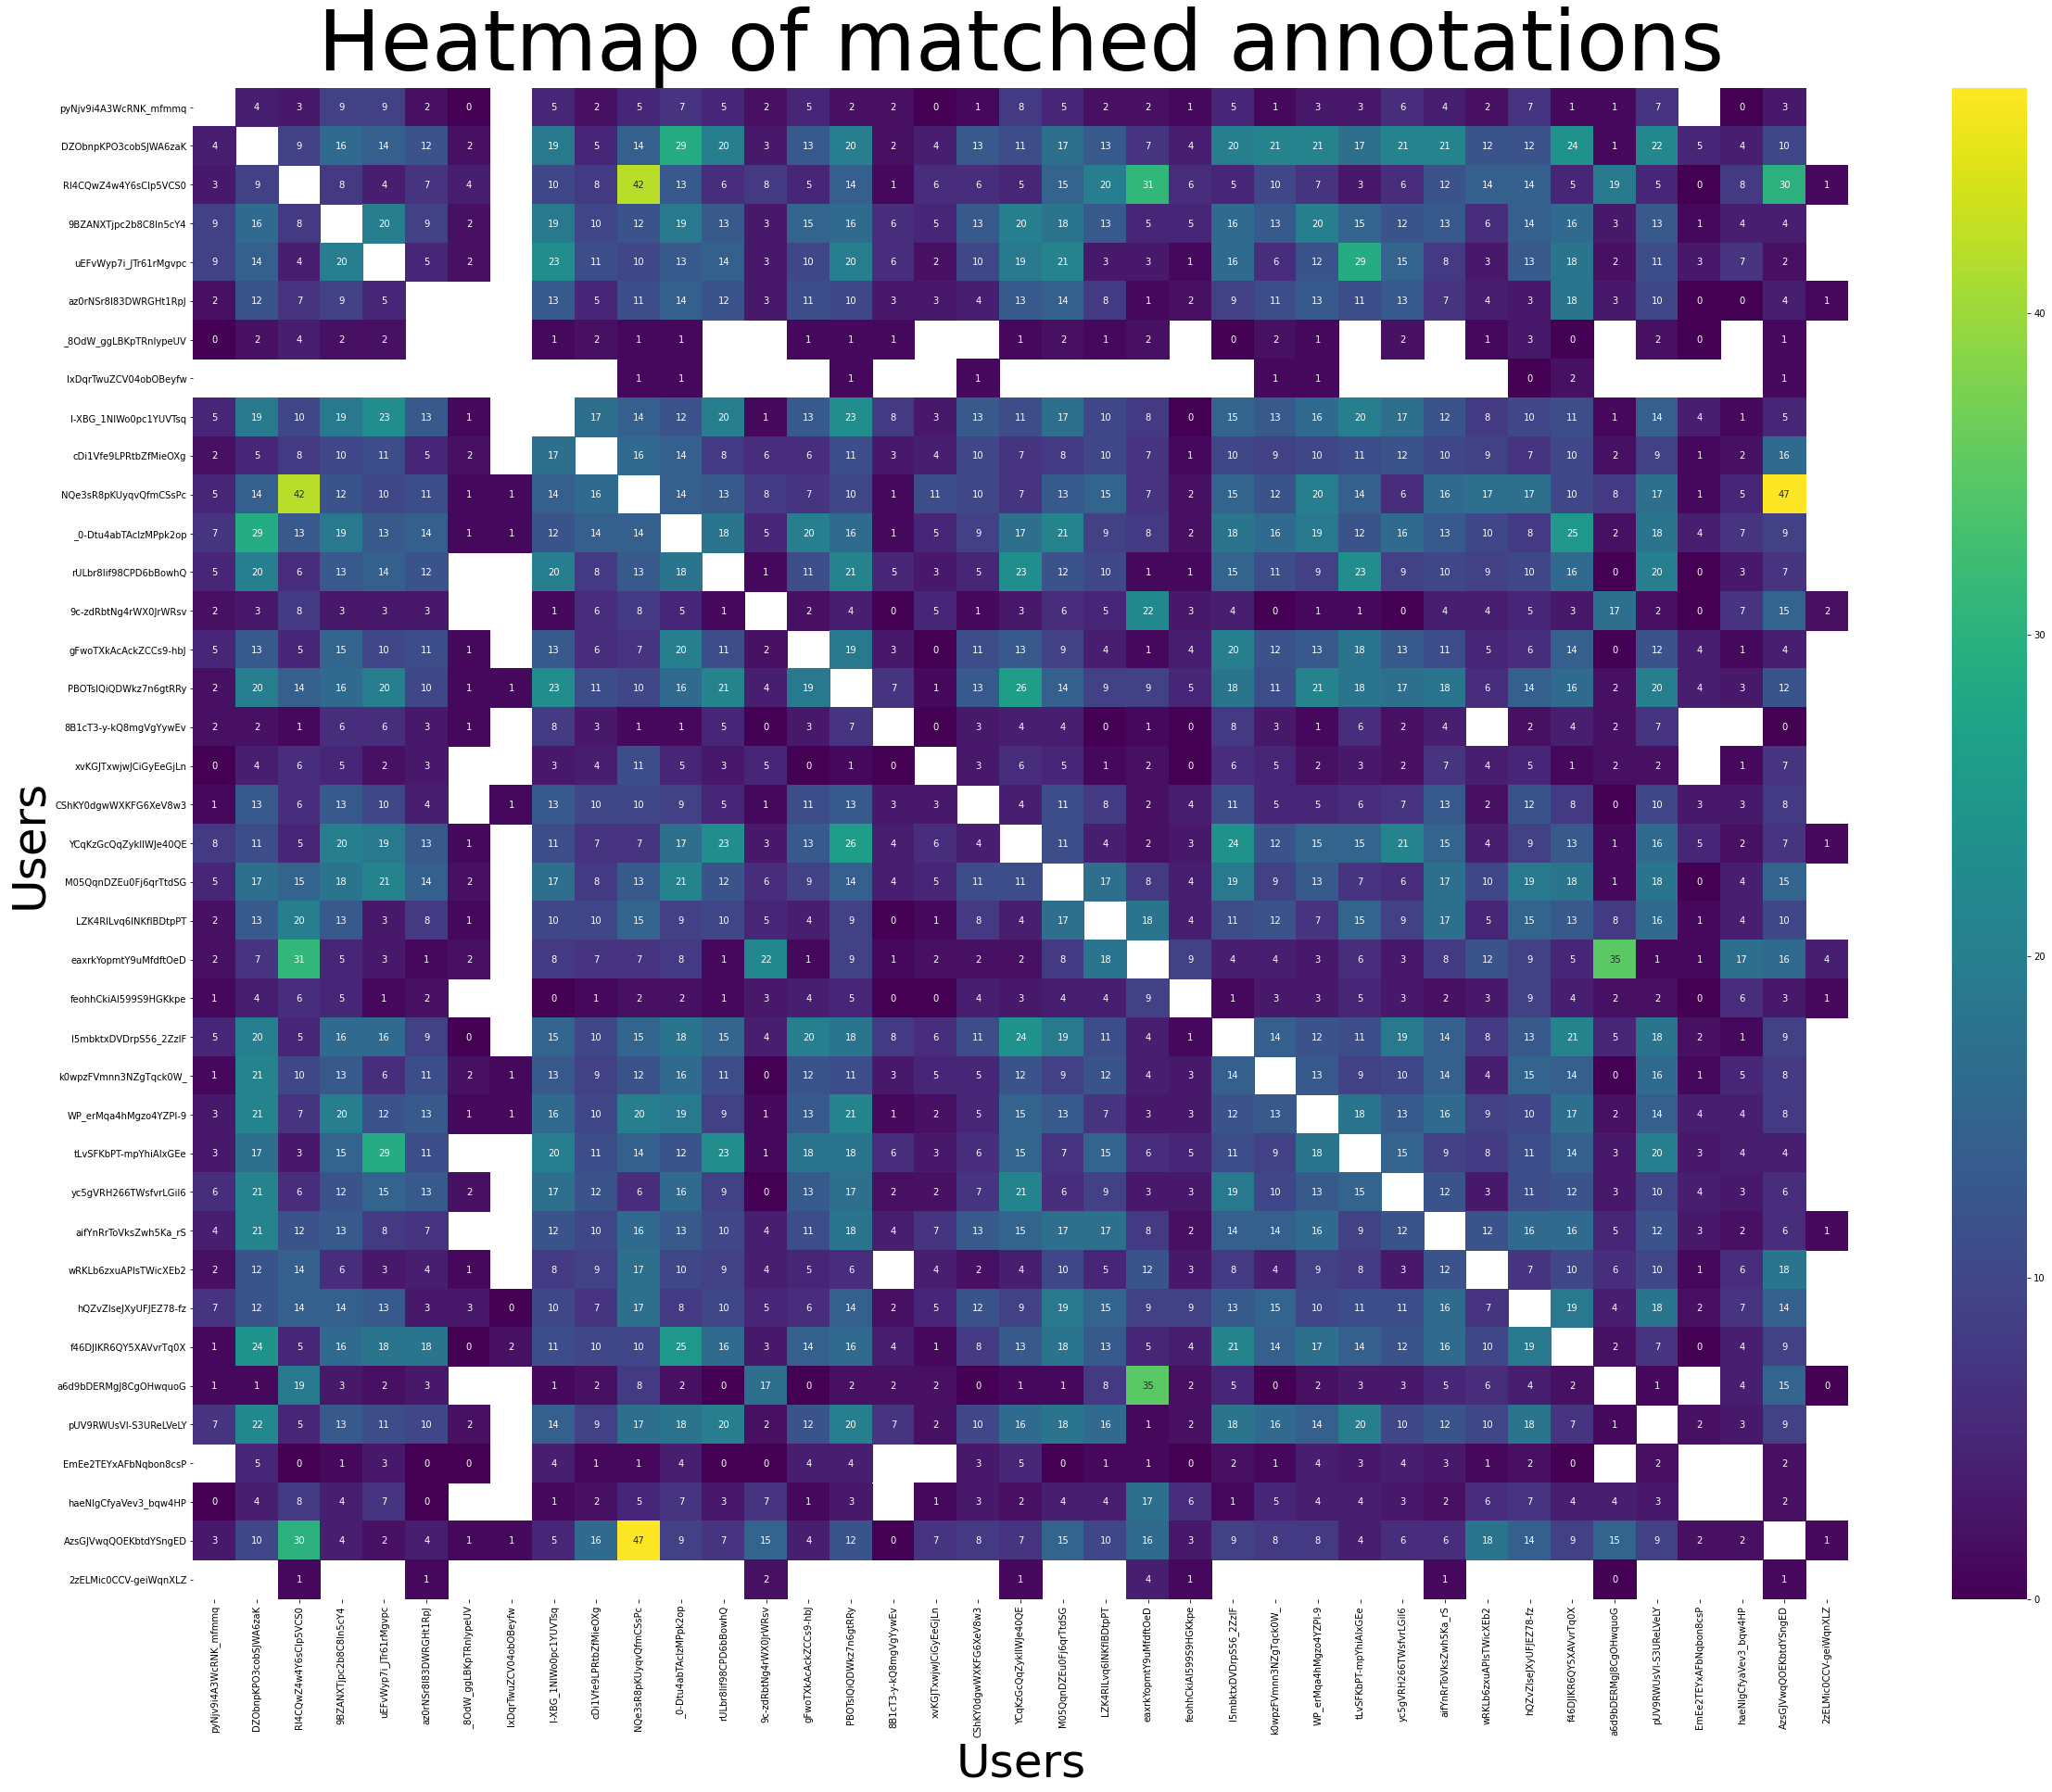

In [72]:
hdf = miss_df.fillna(0).round(2)
plt.figure(figsize=(40,30))
ax = sns.heatmap(hdf, annot=True, fmt="g", cmap='viridis', mask=miss_df.isnull())

plt.title('Heatmap of matched annotations', fontsize = 90) # title with fontsize 20
plt.xlabel('Users', fontsize = 50) # x-axis label with fontsize 15
plt.ylabel('Users', fontsize = 50) # y-axis label with fontsize 15
plt.show()

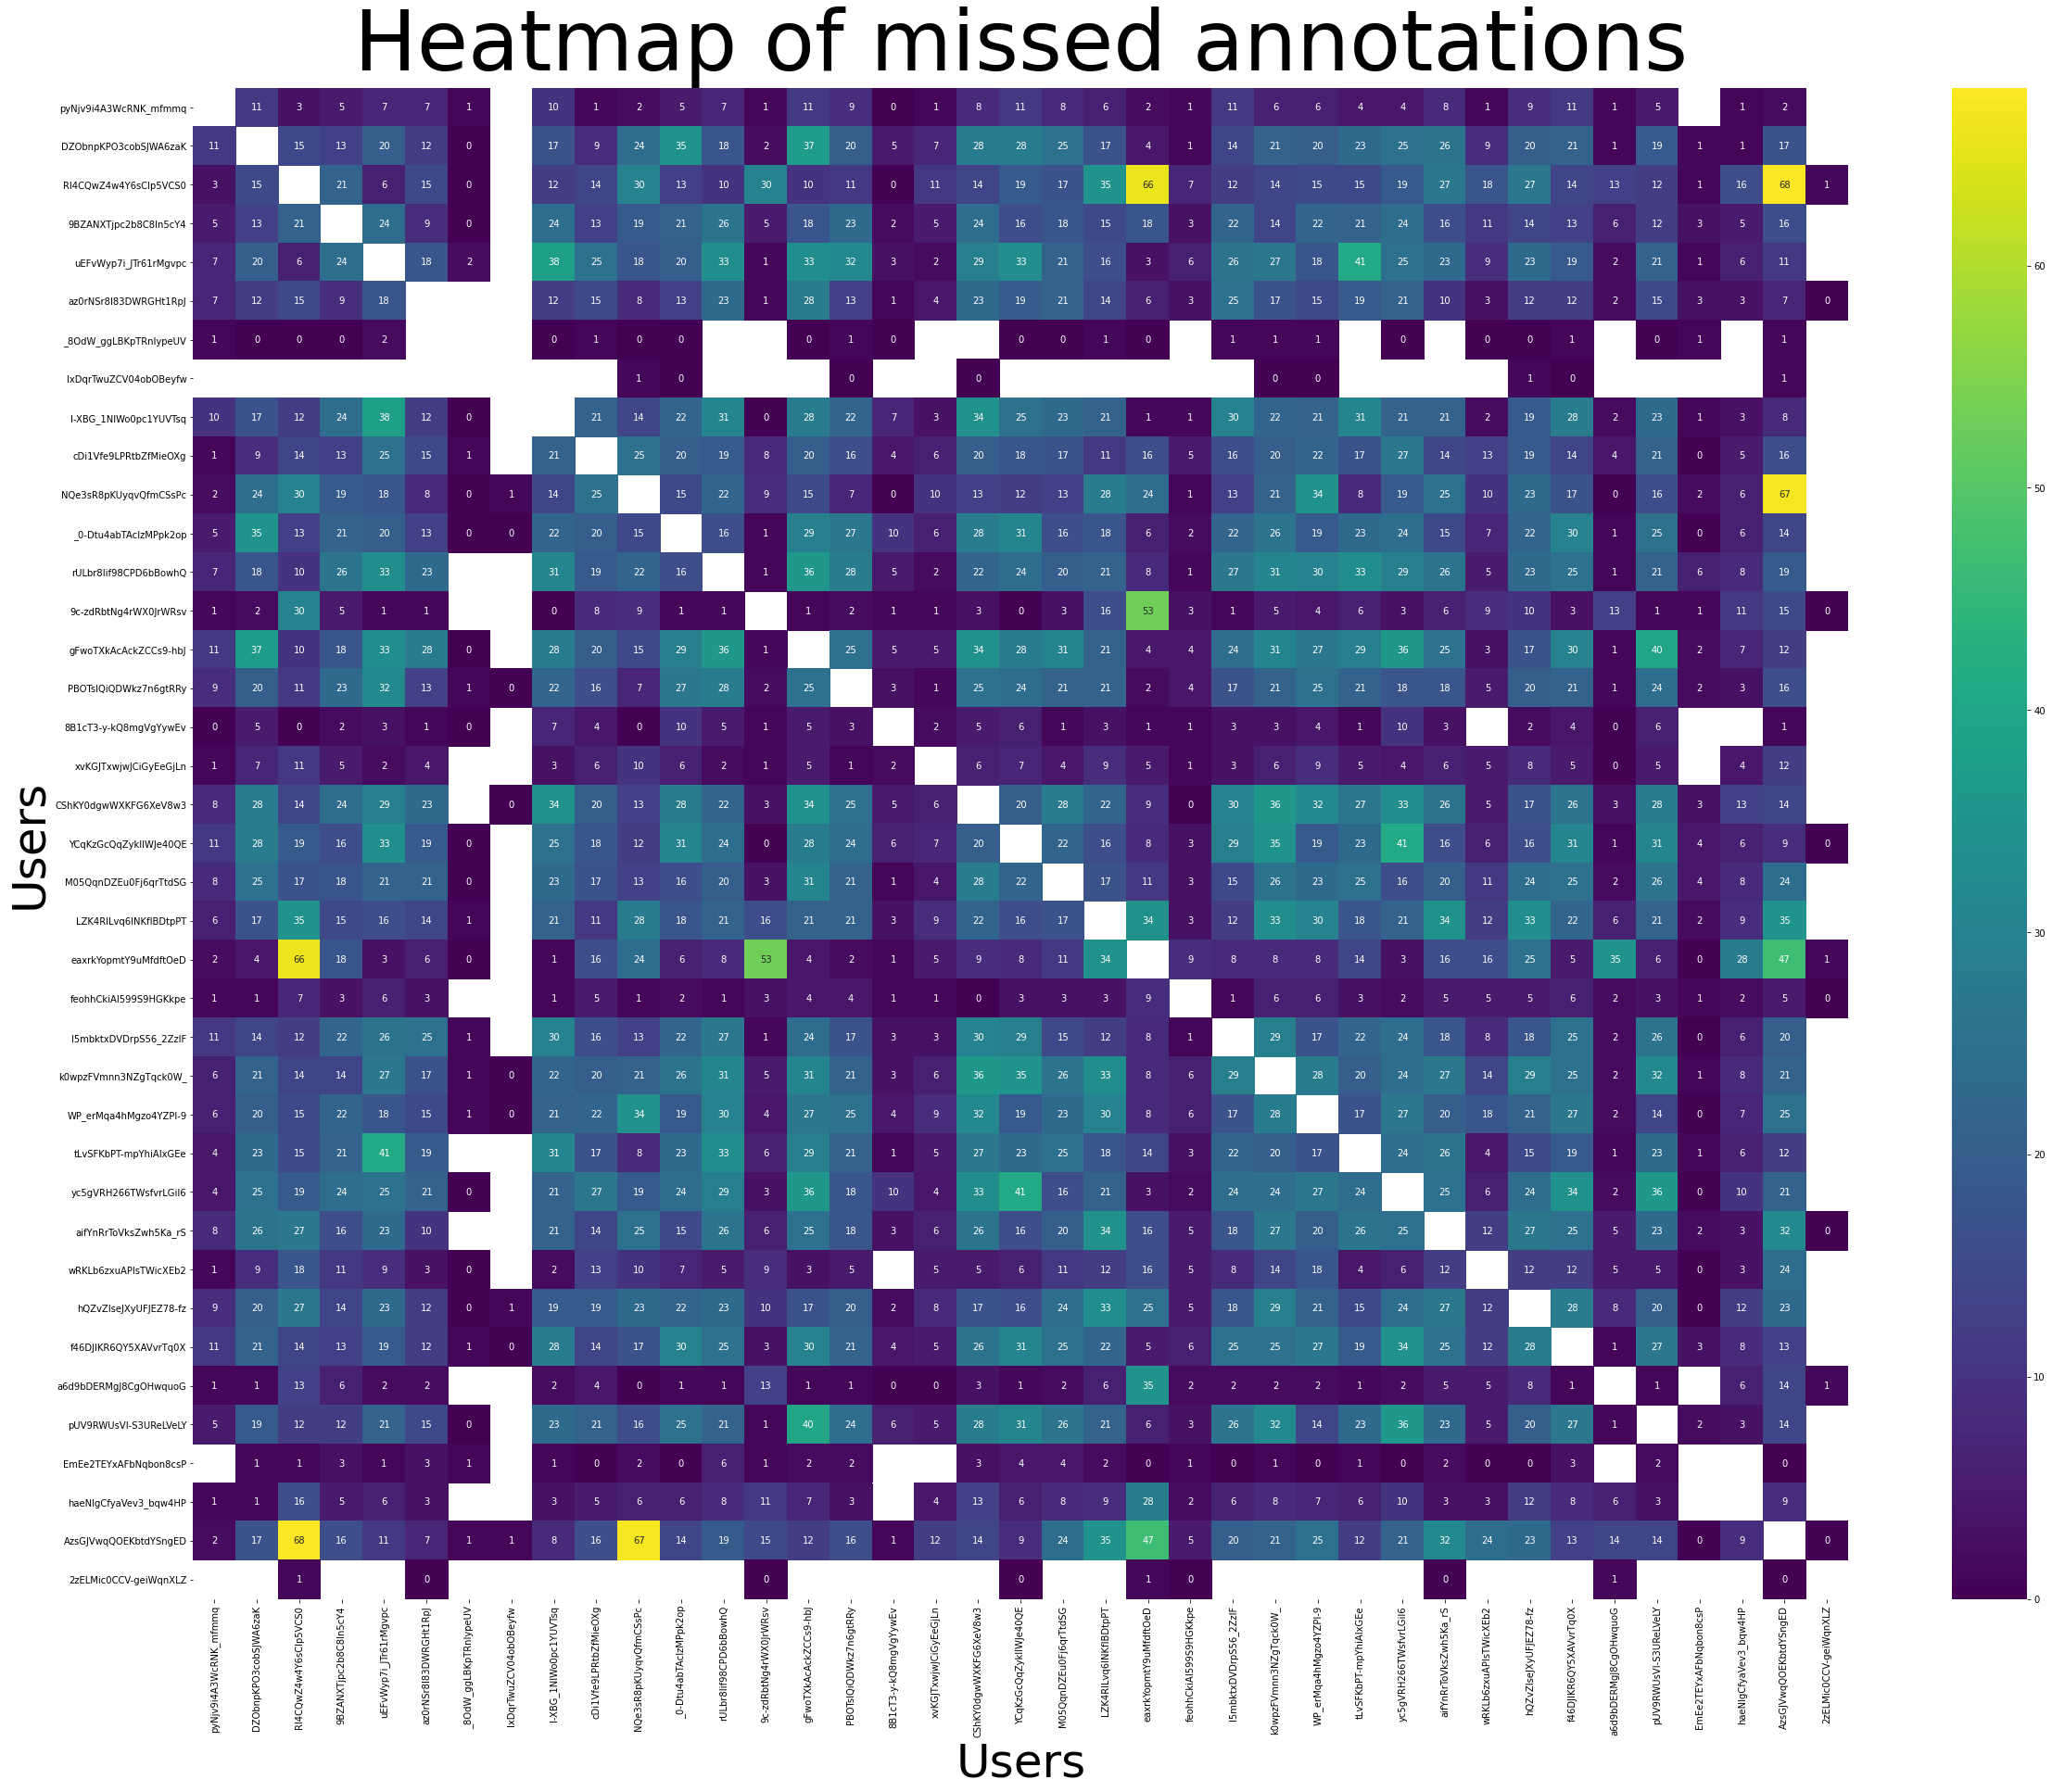

In [73]:
hdf = matched_df.fillna(0).round(2)
plt.figure(figsize=(40,30))
ax = sns.heatmap(hdf, annot=True, fmt="g", cmap='viridis', mask=matched_df.isnull())

plt.title('Heatmap of missed annotations', fontsize = 90) # title with fontsize 20
plt.xlabel('Users', fontsize = 50) # x-axis label with fontsize 15
plt.ylabel('Users', fontsize = 50) # y-axis label with fontsize 15
plt.show()

In [74]:
matched_df.to_csv('../data/matched_counts.csv')
miss_df.to_csv('../data/miss_counts.csv')
ratio_df.to_csv('../data/ratio_score.csv')